In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from pathlib import Path

In [13]:
# Load metadata

cwd_path = Path.cwd()
metadata_path = cwd_path.parent.joinpath("data/archive/CheXpert-v1.0-small/train.csv")
metadata = pd.read_csv(metadata_path)


# Check the first few rows
print(metadata.head())


                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   
2  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
3  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
4  CheXpert-v1.0-small/train/patient00003/study1/...    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   
2         Frontal    AP         NaN                         NaN           NaN   
3         Lateral   NaN         NaN                         NaN           NaN   
4         Frontal    AP         NaN                         NaN           NaN   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           NaN     

In [14]:
print(metadata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Path                        223414 non-null  object 
 1   Sex                         223414 non-null  object 
 2   Age                         223414 non-null  int64  
 3   Frontal/Lateral             223414 non-null  object 
 4   AP/PA                       191027 non-null  object 
 5   No Finding                  22381 non-null   float64
 6   Enlarged Cardiomediastinum  44839 non-null   float64
 7   Cardiomegaly                46203 non-null   float64
 8   Lung Opacity                117778 non-null  float64
 9   Lung Lesion                 11944 non-null   float64
 10  Edema                       85956 non-null   float64
 11  Consolidation               70622 non-null   float64
 12  Pneumonia                   27608 non-null   float64
 13  Atelectasis   

| Name                            | Description                                                                                                         | Possible Values                     |
|---------------------------------|---------------------------------------------------------------------------------------------------------------------|-------------------------------------|
| **Path**                        | The file path to the chest X-ray image, indicating the location of the image in the dataset.                      | String (file path)                  |
| **Sex**                         | The biological sex of the patient.                                        | 'Male', 'Female', 'Unknown'                        |
| **Age**                         | The age of the patient in years, providing insight into the demographics of the dataset.                          | Integer (years)                     |
| **Frontal/Lateral**             | The view of the chest X-ray, indicating whether the image was taken from the front (Frontal) or the side (Lateral).| 'Frontal', 'Lateral'                    |
| **AP/PA**                       | The type of chest X-ray projection, where 'AP' stands for Anteroposterior and 'PA' stands for Posteroanterior.    | 'AP', 'PA', 'LL', 'FL', NaN                              |
| **No Finding**                  | A binary indicator representing whether there are no significant findings in the X-ray.                           | 1.0, 0.0, -1.0, NaN                            |
| **Enlarged Cardiomediastinum** | A binary indicator for the presence of an enlarged cardiomediastinum, which may suggest cardiovascular conditions. | 1.0, 0.0, -1.0, NaN                            |
| **Cardiomegaly**                | A binary indicator indicating whether cardiomegaly (enlargement of the heart) is present in the X-ray.             | 1.0, 0.0, -1.0, NaN                           |
| **Lung Opacity**                | A binary indicator that indicates the presence of lung opacity, which may signify various pulmonary conditions.    | 1.0, 0.0, -1.0, NaN                           |
| **Lung Lesion**                 | A binary indicator for the presence of lung lesions, which can be indicative of tumors or other abnormalities.     | 1.0, 0.0, -1.0, NaN                            |
| **Edema**                        | A binary indicator indicating the presence of pulmonary edema, characterized by excess fluid in the lungs.        | 1.0, 0.0, -1.0, NaN                          |
| **Consolidation**               | A binary indicator representing whether lung consolidation is present, which may indicate pneumonia or other infections. | 1.0, 0.0, -1.0, NaN                       |
| **Pneumonia**                   | A binary indicator for the presence of pneumonia, reflecting acute lung inflammation.                              | 1.0, 0.0, -1.0, NaN                          |
| **Atelectasis**                 | A binary indicator indicating the presence of atelectasis, which is the collapse or incomplete expansion of the lung. | 1.0, 0.0, -1.0, NaN                       |
| **Pneumothorax**                | A binary indicator for the presence of pneumothorax, which is the presence of air in the pleural space.           | 1.0, 0.0, -1.0, NaN                            |
| **Pleural Effusion**            | A binary indicator indicating the presence of pleural effusion, the accumulation of fluid in the pleural cavity.   | 1.0, 0.0, -1.0, NaN                           |
| **Pleural Other**               | A binary indicator for other pleural conditions that do not fall under specific categories.                       | 1.0, 0.0, -1.0, NaN                           |
| **Fracture**                    | A binary indicator indicating the presence of a fracture visible in the X-ray.                                     | 1.0, 0.0, -1.0, NaN                           |
| **Support Devices**             | A binary indicator representing the presence of any medical support devices (e.g., tubes, catheters) observed in the X-ray. | 1.0, 0.0, -1.0, NaN                       |


In [15]:
metadata.describe()

,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
count,223414.000000,22381.0,44839.000000,46203.000000,117778.000000,11944.000000,85956.000000,70622.000000,27608.000000,68443.000000,78934.000000,133211.000000,6492.000000,12194.000000,123217.000000
mean,60.430653,1.0,-0.035795,0.409346,0.848911,0.644508,0.456769,-0.183498,-0.461134,-0.005304,0.206540,0.559706,0.134011,0.688699,0.932680
std,17.820925,0.0,0.718442,0.769323,0.472571,0.691607,0.741785,0.753980,0.828249,0.990244,0.493529,0.648859,0.966183,0.565435,0.283377
min,0.000000,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,1.0,-1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000
50%,62.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,74.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#### Checking Missing Values 
print(metadata.isnull().sum())

# The dataset contains a significant number of missing values across various columns. 

Path                               0
Sex                                0
Age                                0
Frontal/Lateral                    0
AP/PA                          32387
No Finding                    201033
Enlarged Cardiomediastinum    178575
Cardiomegaly                  177211
Lung Opacity                  105636
Lung Lesion                   211470
Edema                         137458
Consolidation                 152792
Pneumonia                     195806
Atelectasis                   154971
Pneumothorax                  144480
Pleural Effusion               90203
Pleural Other                 216922
Fracture                      211220
Support Devices               100197
dtype: int64


## Explore Images

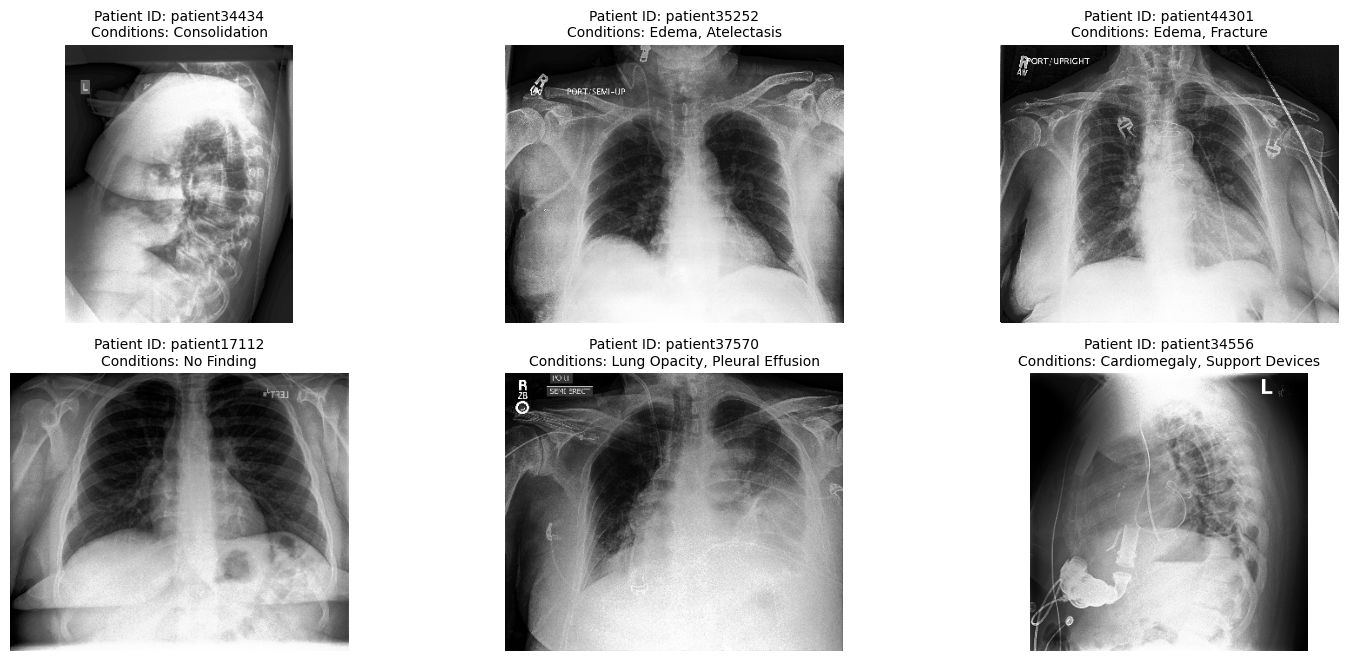

In [17]:
def display_images_with_captions(image_paths, metadata, metadata_num, metadata_path, cols=3, row_space=0.5):
    base_dir = metadata_path.parent.parent  # Going up two levels: one from train.csv to CheXpert-v1.0-small, another from that to archive

    plt.figure(figsize=(15, 10))
    
    for i, img_path in enumerate(image_paths):
        # Prepend the base directory to the image path
        full_path = os.path.join(base_dir, img_path)  # Now this will point to the correct location
        img = cv2.imread(full_path)
        
        if img is None:
            print(f"Image at path {full_path} could not be loaded.")
            continue

        # Extract patient ID from the folder name in the image path
        patient_id = img_path.split('/')[2]  # Assuming "train/patientID/studyX/image.png" format

        # Get the corresponding row in metadata for this image
        row = metadata[metadata['Path'] == img_path].iloc[0]
        
        # Find columns in metadata_num where the value is 1.0
        positive_conditions = metadata_num.loc[row.name] == 1.0
        conditions = positive_conditions[positive_conditions].index.tolist()
        
        # Generate caption
        caption = f"Patient ID: {patient_id}\nConditions: {', '.join(conditions)}"
        
        # Display image with caption
        plt.subplot(len(image_paths) // cols + 1, cols, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(caption, fontsize=10)
        plt.axis('off')
        
    # Adjust subplot parameters for spacing
    plt.subplots_adjust(hspace=row_space)
    plt.tight_layout()
    plt.show()

# Sample 6 image paths
sample_images = metadata['Path'].sample(6).tolist()

# Display sample images with captions
display_images_with_captions(sample_images, metadata, metadata.select_dtypes(include=['number']), metadata_path)

In [18]:
### "Patient_ID" could be useful in the future (if we decide to remove rows with missing values or w/e), so adding it as a column in metadata 

# Function to extract patient ID from the image path
def extract_patient_id(path):
    return path.split('/')[2]  # Adjust the index based on your path structure

# Apply the function
metadata['Patient_ID'] = metadata['Path'].apply(extract_patient_id)

# Display the updated df
print(metadata.head())

                                                Path     Sex  Age  \
0  CheXpert-v1.0-small/train/patient00001/study1/...  Female   68   
1  CheXpert-v1.0-small/train/patient00002/study2/...  Female   87   
2  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
3  CheXpert-v1.0-small/train/patient00002/study1/...  Female   83   
4  CheXpert-v1.0-small/train/patient00003/study1/...    Male   41   

  Frontal/Lateral AP/PA  No Finding  Enlarged Cardiomediastinum  Cardiomegaly  \
0         Frontal    AP         1.0                         NaN           NaN   
1         Frontal    AP         NaN                         NaN          -1.0   
2         Frontal    AP         NaN                         NaN           NaN   
3         Lateral   NaN         NaN                         NaN           NaN   
4         Frontal    AP         NaN                         NaN           NaN   

   Lung Opacity  Lung Lesion  Edema  Consolidation  Pneumonia  Atelectasis  \
0           NaN     

### Basic Distributions

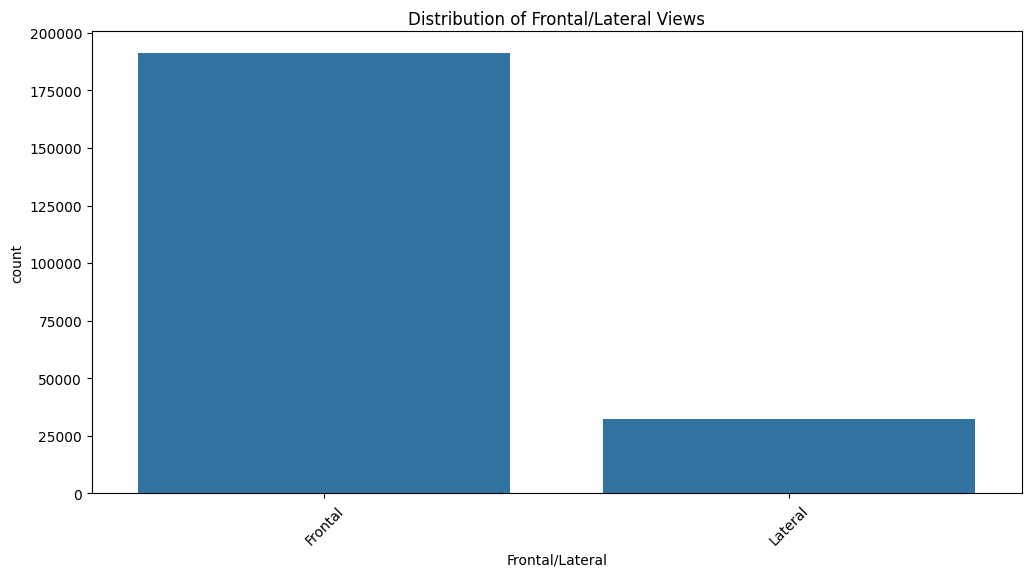

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(data=metadata, x='Frontal/Lateral', order=metadata['Frontal/Lateral'].value_counts().index)
plt.title('Distribution of Frontal/Lateral Views')
plt.xticks(rotation=45)
plt.show()


In [20]:
metadata['Sex'].value_counts()

Sex
Male       132636
Female      90777
Unknown         1
Name: count, dtype: int64

In [21]:
# Removing the single 'Unknown' value 
metadata = metadata[metadata['Sex'] != 'Unknown']

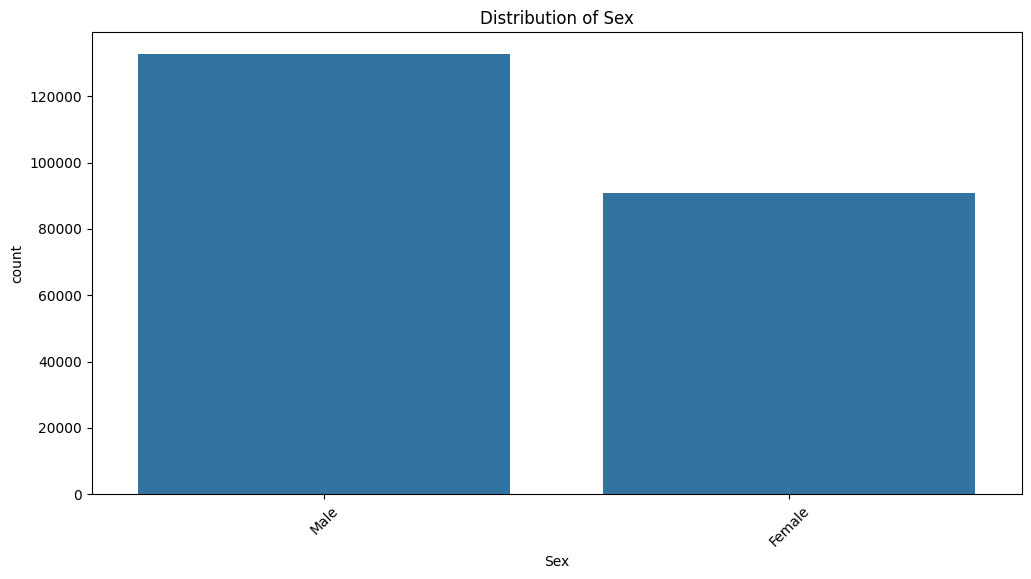

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=metadata, x='Sex', order=metadata['Sex'].value_counts().index)
plt.title('Distribution of Sex')
plt.xticks(rotation=45)
plt.show()


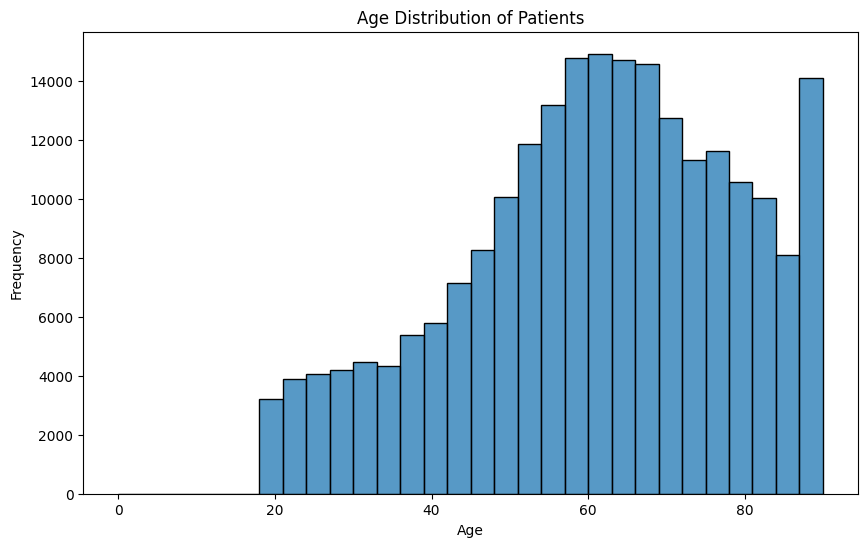

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(metadata['Age'], bins=30, kde=False)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


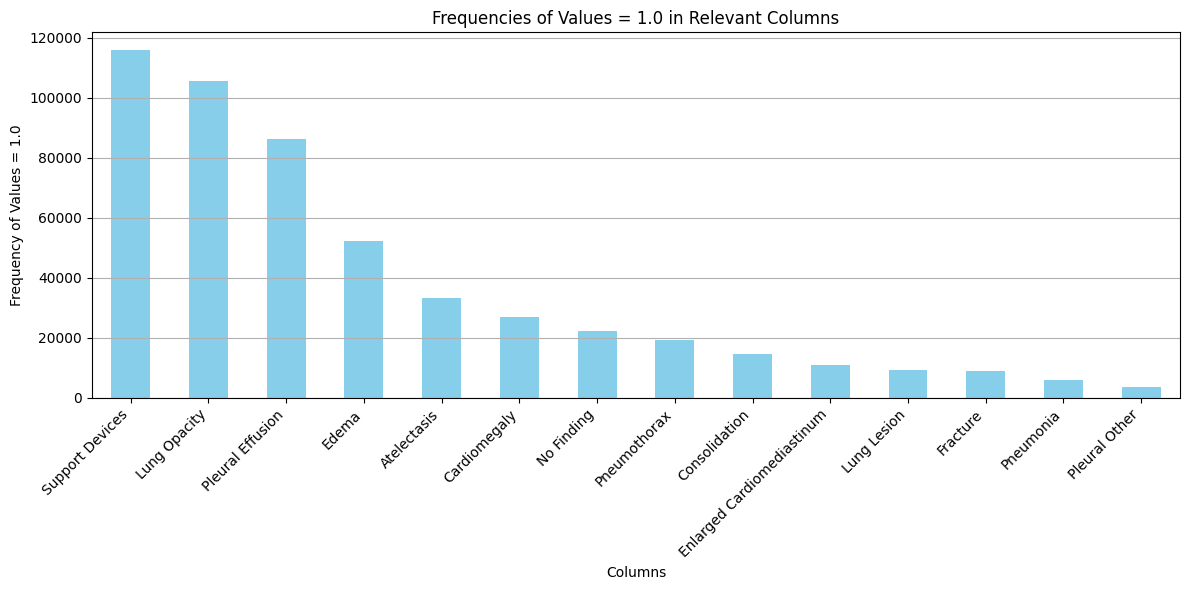

In [24]:
data_counts = {
    "No Finding": (metadata["No Finding"] == 1.0).sum(),
    "Enlarged Cardiomediastinum": (metadata["Enlarged Cardiomediastinum"] == 1.0).sum(),
    "Cardiomegaly": (metadata["Cardiomegaly"] == 1.0).sum(),
    "Lung Opacity": (metadata["Lung Opacity"] == 1.0).sum(),
    "Lung Lesion": (metadata["Lung Lesion"] == 1.0).sum(),
    "Edema": (metadata["Edema"] == 1.0).sum(),
    "Consolidation": (metadata["Consolidation"] == 1.0).sum(),
    "Pneumonia": (metadata["Pneumonia"] == 1.0).sum(),
    "Atelectasis": (metadata["Atelectasis"] == 1.0).sum(),
    "Pneumothorax": (metadata["Pneumothorax"] == 1.0).sum(),
    "Pleural Effusion": (metadata["Pleural Effusion"] == 1.0).sum(),
    "Pleural Other": (metadata["Pleural Other"] == 1.0).sum(),
    "Fracture": (metadata["Fracture"] == 1.0).sum(),
    "Support Devices": (metadata["Support Devices"] == 1.0).sum()
}

# Convert the counts to a DataFrame
frequencies = pd.Series(data_counts)

# Create the barplot
plt.figure(figsize=(12, 6))
frequencies.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Frequencies of Values = 1.0 in Relevant Columns')
plt.xlabel('Columns')
plt.ylabel('Frequency of Values = 1.0')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()


### Value Indicators 

- **1.0**: Indicates that the condition is present (positive finding).
- **0.0**: Indicates that the condition is absent (negative finding).
- **-1.0**: Indicates that the annotators could not definitively determine the presence or absence of a condition
- **NaN**: Indicates that the information is missing or not available (not applicable) ➔ will be mapped as `-1.0` 

### Exception:

For the **AP/PA** column, the **NaN** values will be removed. This decision is made because we are developing a **Personalized Machine Learning** model, which requires a clean and consistent dataset for segmentation. Specifically, we plan to split the dataset based on the **AP/PA** values to explore potential variations in the imaging characteristics of chest X-rays captured from different perspectives (Anterior-Posterior vs. Posteroanterior). Keeping only valid entries allows for more accurate segmentation and model training, ensuring that our analysis is based on reliable data while maintaining the integrity of the patient-specific features.


In [25]:
# Remove NaN values in the 'AP/PA' column
metadata['AP/PA'].dropna(inplace=True)

# Define the columns to map NaN values to -1.0
columns_to_map = [
    "No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", 
    "Lung Opacity", "Lung Lesion", "Edema", "Consolidation", 
    "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion", 
    "Pleural Other", "Fracture", "Support Devices"
]

# Use .loc[] to modify the original DataFrame
metadata.loc[:, columns_to_map] = metadata[columns_to_map].fillna(-1.0)


In [26]:
metadata['AP/PA'].value_counts()

AP/PA
AP    161590
PA     29419
LL        16
RL         1
Name: count, dtype: int64

In [27]:
metadata = metadata[metadata['AP/PA'].isin(['AP', 'PA'])].reset_index(drop=True)

metadata = metadata.dropna(subset=['AP/PA']).reset_index(drop=True)

metadata.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient_ID
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,1.0,patient00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,patient00002
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,patient00002
3,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,patient00003
4,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,patient00004


In [28]:
metadata['AP/PA'].value_counts()

AP/PA
AP    161590
PA     29419
Name: count, dtype: int64

### Correlation Analysis

In [29]:
metadata_num = metadata.select_dtypes(include=['number'])

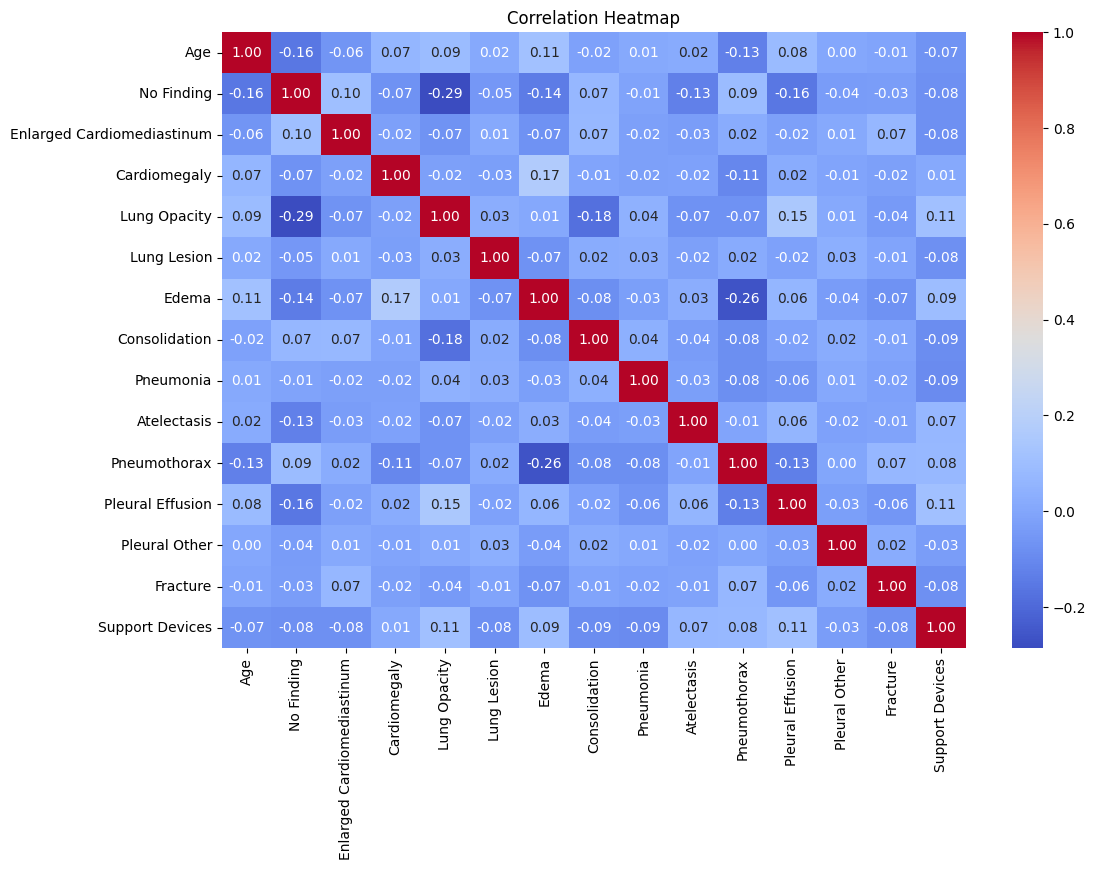

In [30]:
plt.figure(figsize=(12, 8))
correlation_matrix = metadata_num.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

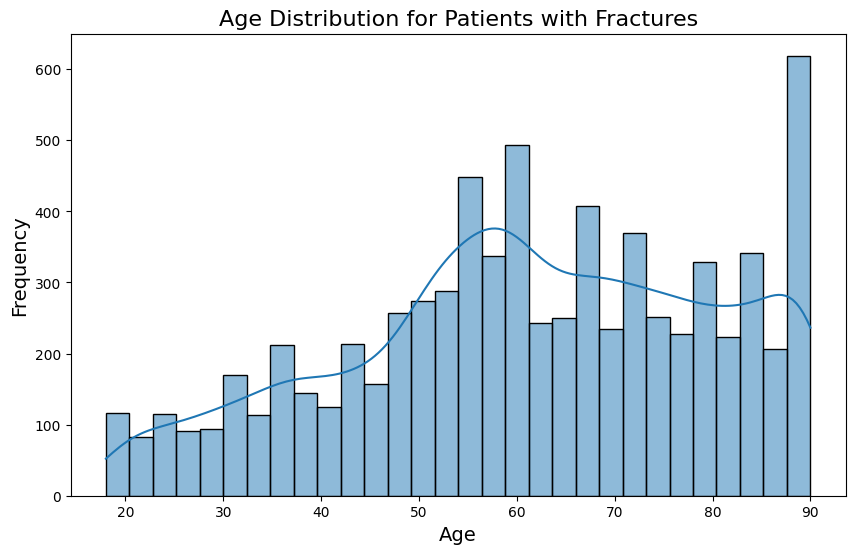

In [31]:
### Plot for Age Distribution for Patients with Fractures

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(metadata[metadata['Fracture'] == 1.0]['Age'], kde=True, bins=30)

# Add titles and labels
plt.title('Age Distribution for Patients with Fractures', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [32]:
## Final check: Missing Values and Duplicates 

# Display the duplicate rows (if any)
print(metadata[metadata.duplicated()])


Empty DataFrame
Columns: [Path, Sex, Age, Frontal/Lateral, AP/PA, No Finding, Enlarged Cardiomediastinum, Cardiomegaly, Lung Opacity, Lung Lesion, Edema, Consolidation, Pneumonia, Atelectasis, Pneumothorax, Pleural Effusion, Pleural Other, Fracture, Support Devices, Patient_ID]
Index: []


In [33]:
# Missing Values 
print(metadata.isnull().sum())

Path                          0
Sex                           0
Age                           0
Frontal/Lateral               0
AP/PA                         0
No Finding                    0
Enlarged Cardiomediastinum    0
Cardiomegaly                  0
Lung Opacity                  0
Lung Lesion                   0
Edema                         0
Consolidation                 0
Pneumonia                     0
Atelectasis                   0
Pneumothorax                  0
Pleural Effusion              0
Pleural Other                 0
Fracture                      0
Support Devices               0
Patient_ID                    0
dtype: int64


In [34]:
# Define the path for the 'data/cleanup' directory
output_dir = os.path.join(cwd_path.parent, 'data', 'cleanup')

# Create the 'cleanup' directory
os.makedirs(output_dir, exist_ok=True)

# Save the clean metadata DataFrame to a CSV file
metadata.to_csv(os.path.join(output_dir, 'clean_train.csv'), index=False)

print("Metadata has been saved to 'data/cleanup/clean_train.csv'")

Metadata has been saved to 'data/cleanup/clean_train.csv'


In [35]:
# Define the path for the new 'cleanup' directory, outside 'data'
output_dir = os.path.join(cwd_path.parent, 'cleanup')

# Create the 'cleanup' directory
os.makedirs(output_dir, exist_ok=True)

# Save the clean metadata DataFrame to a CSV file inside the 'cleanup' directory
metadata.to_csv(os.path.join(output_dir, 'clean_train.csv'), index=False)

print("Metadata has been saved to 'cleanup/clean_train.csv'")


Metadata has been saved to 'cleanup/clean_train.csv'


## Splitting the Dataset

In [36]:
## Split and create two .csv for the training of the segments 

metadata_ap = metadata[metadata['AP/PA'] == 'AP']
metadata_pa = metadata[metadata['AP/PA'] == 'PA']

# Save these subsets to CSVs
metadata_ap.to_csv(os.path.join(output_dir, 'clean_AP_train.csv'), index=False)
metadata_pa.to_csv(os.path.join(output_dir, 'clean_PA_train.csv'), index=False)

print("AP and PA datasets have been saved.")

AP and PA datasets have been saved.


In [37]:
# Summary statistics for both AP and PA datasets
print("Summary Statistics for AP dataset:")
metadata_ap.describe()

Summary Statistics for AP dataset:


,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
count,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000,161590.000000
mean,61.335918,-0.858023,-0.846965,-0.717612,0.067541,-0.937447,-0.334841,-0.785049,-0.950684,-0.667059,-0.559082,-0.051037,-0.980952,-0.915942,0.254050
std,17.838563,0.513612,0.474909,0.675327,0.986611,0.345704,0.903543,0.557572,0.299845,0.741869,0.665729,0.948775,0.192717,0.389282,0.952409
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,50.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,63.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,1.000000
75%,75.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
metadata_pa.describe()

,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
count,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000,29419.000000
mean,57.034162,-0.626228,-0.694653,-0.693871,-0.287535,-0.838642,-0.735715,-0.631837,-0.889391,-0.773582,-0.593596,-0.125123,-0.927394,-0.888575,-0.421054
std,17.248521,0.779653,0.556547,0.640462,0.931007,0.528764,0.557344,0.578333,0.424057,0.626397,0.603124,0.811578,0.368969,0.441520,0.892810
min,18.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,46.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,58.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000
75%,69.000000,-1.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


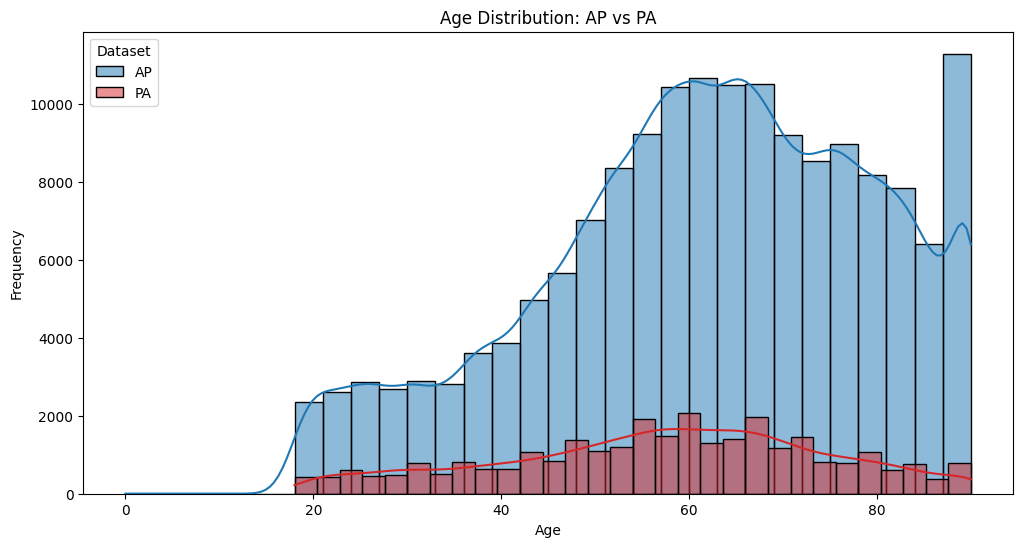

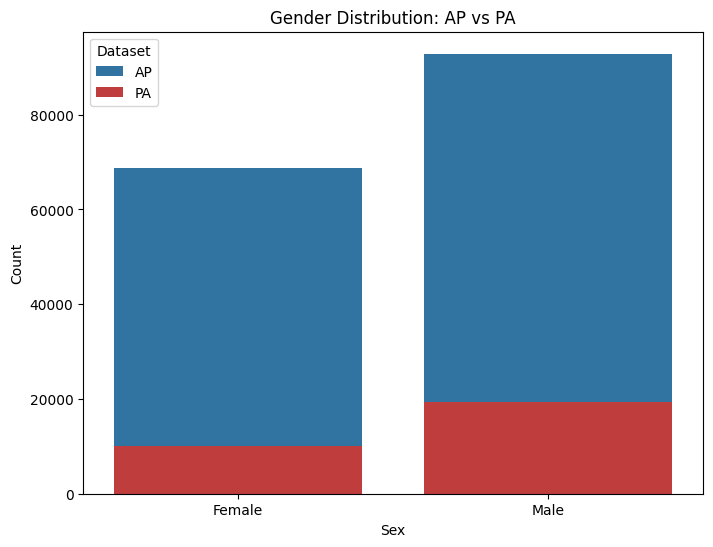

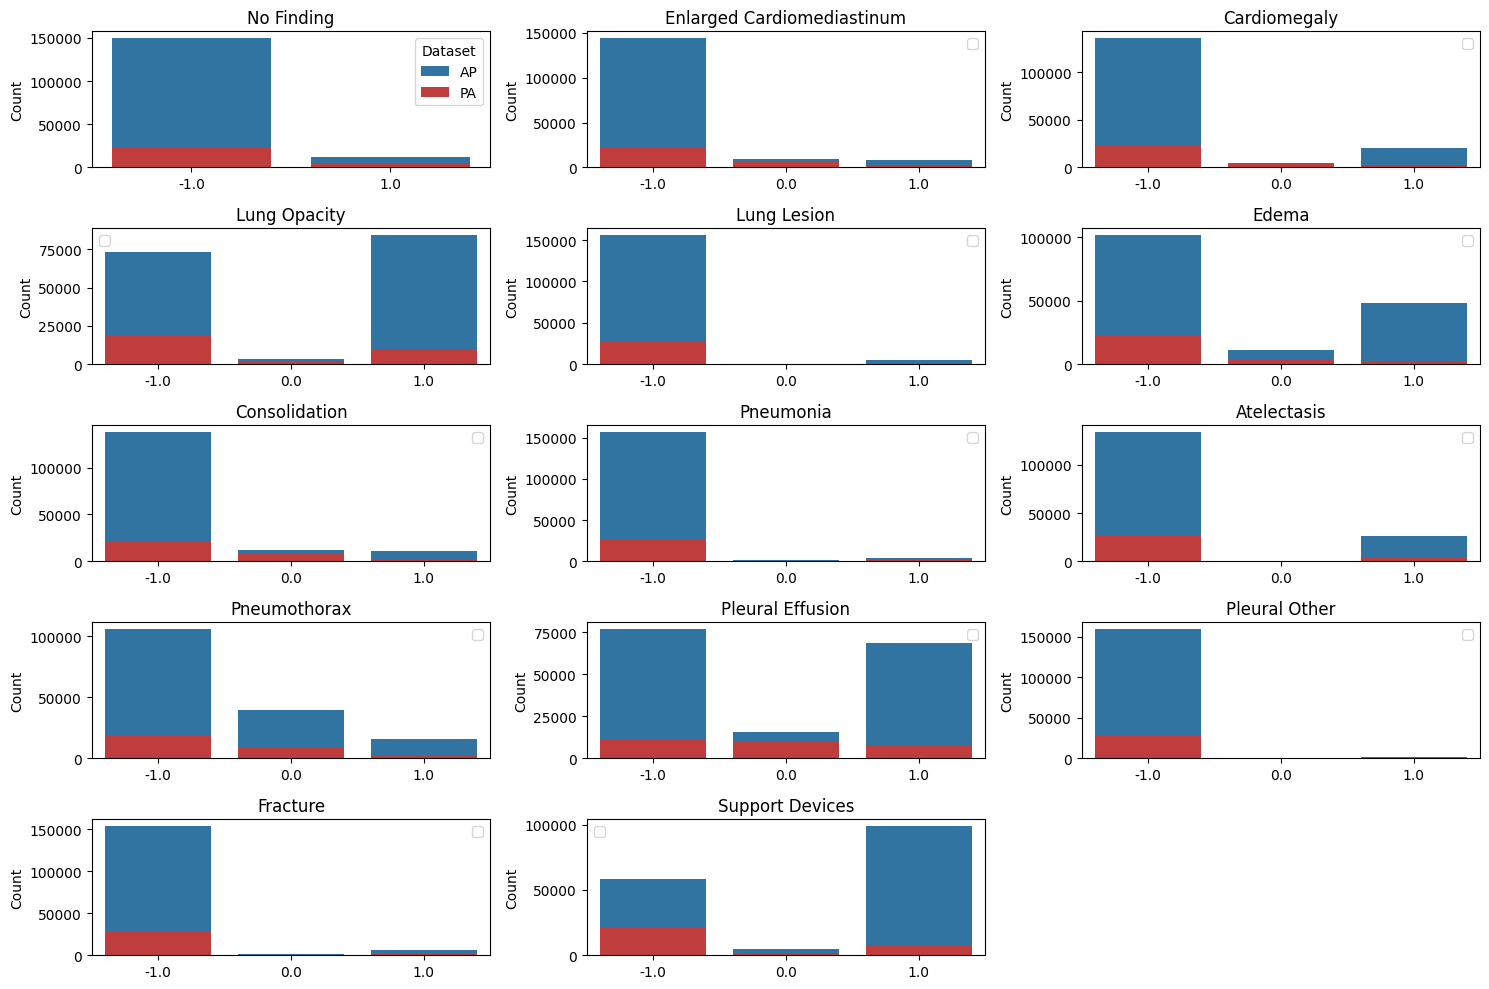

In [39]:
# Define consistent colors
ap_color = 'tab:blue'    # This is a cleaner blue
pa_color = 'tab:red'     # This is a cleaner red

# Age distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(data=metadata_ap, x='Age', kde=True, color=ap_color, bins=30, label='AP')
sns.histplot(data=metadata_pa, x='Age', kde=True, color=pa_color, bins=30, label='PA')
plt.legend(title='Dataset')
plt.title('Age Distribution: AP vs PA')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution plot
plt.figure(figsize=(8, 6))
ap_counts = sns.countplot(data=metadata_ap, x='Sex', color=ap_color, label='AP')
pa_counts = sns.countplot(data=metadata_pa, x='Sex', color=pa_color, label='PA')
plt.title('Gender Distribution: AP vs PA')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.show()

# Medical conditions distribution plot
condition_columns = [
    "No Finding", "Enlarged Cardiomediastinum", "Cardiomegaly", "Lung Opacity", "Lung Lesion", 
    "Edema", "Consolidation", "Pneumonia", "Atelectasis", "Pneumothorax", "Pleural Effusion", 
    "Pleural Other", "Fracture", "Support Devices"
]

fig = plt.figure(figsize=(15, 10))
for i, condition in enumerate(condition_columns):
    plt.subplot(5, 3, i + 1)
    
    # Plot AP data
    sns.countplot(data=metadata_ap, x=condition, color=ap_color, label='AP')
    
    # Plot PA data
    sns.countplot(data=metadata_pa, x=condition, color=pa_color, label='PA')
    
    plt.title(f'{condition}')
    plt.xlabel('')  # Remove x-label as it's redundant
    plt.ylabel('Count')
    
    # Only show legend for the first subplot
    if i == 0:
        plt.legend(title='Dataset')
    else:
        plt.legend([])

plt.tight_layout()
plt.show()

# CheXpert Dataset Distribution Analysis

## Individual Condition Analysis

### A. High Uncertainty Conditions
1. **No Finding**
   - Dominated by uncertain labels (-1.0)
   - Very few definitive negative (0.0) or positive (1.0) cases
   - Consistent with NLP extraction methodology

2. **Pneumonia**
   - High proportion of uncertain labels
   - Minimal definitive diagnoses
   - Reflects the challenging nature of pneumonia diagnosis from reports

3. **Pleural Other**
   - Large number of uncertain cases
   - Very few definitive diagnoses
   - Suggests difficulty in precise categorization of pleural conditions

### B. More Definitive Conditions
1. **Support Devices**
   - Unique pattern with more positive (1.0) cases
   - Fewer uncertain labels
   - Expected due to clear visibility in X-rays

2. **Pleural Effusion**
   - More balanced distribution across labels
   - Significant number of positive cases
   - Suggests more confident reporting in radiology notes

3. **Lung Opacity**
   - Notable presence across all three categories
   - Substantial number of positive cases
   - Indicates frequent and varied reporting in medical records

### C. Rare or Challenging Diagnoses
1. **Lung Lesion**
   - Predominantly uncertain labels
   - Very few definitive diagnoses
   - Suggests cautious reporting practices

2. **Fracture**
   - Majority uncertain labels
   - Few positive cases
   - Reflects either low prevalence or conservative reporting

##  View Distribution
- AP (blue) views consistently outnumber PA (red) views
- Consistent ratio maintained across most conditions
- Typical of clinical settings where AP views are common for bedbound patients

## Key Implications
- Uncertainty handling is crucial for model development
- Different strategies might be needed for different conditions
- Validation methods should account for label uncertainty
- Some conditions show more reliable labeling than others
- Support devices and pleural effusions have more definitive labels
- High uncertainty in many conditions reflects real-world diagnostic challenges

### For Model Development
- Need for sophisticated uncertainty handling strategies:
  * U-Zeros (uncertain → negative)
  * U-Ones (uncertain → positive)
  * Ignore uncertain labels
  * Semi-supervised approaches
- Different approaches might be optimal for different conditions

## Data Quality
- High uncertainty rates reflect extraction methodology, not data quality issues
- Consistent with expected clinical ambiguity in radiology reports
- More objective findings (e.g., support devices) show clearer labeling patterns


-------------------------------

# Support Devices Distribution Analysis in CheXpert

## Key Observations:
- **Inverse AP/PA Pattern**: Support Devices shows more positive cases (1.0) in PA (red) views, contrary to most conditions that have more AP (blue) views.
- **Distinct Label Distribution**: Fewer uncertain labels (-1.0) and more positive cases (1.0) compared to other conditions.

## Analysis Approach:
1. **Basic Statistics**: Total counts and proportions for each label and view type.
2. **Data Organization**: Structured summary DataFrame with label counts, proportions, and AP/PA statistics.
3. **Visualization**: Grouped bar plot comparing AP and PA views, highlighting label differences.

## Why AP Makes Support Devices Detection Easier:
1. **Better Visibility**: AP views may provide a clearer, unobstructed view of devices like ventilators or IV lines that are more commonly placed at the front of the body, leading to easier detection.
2. **Fewer Ambiguous Cases**: The higher proportion of positive cases and fewer uncertain labels in AP views suggest that devices are easier to identify without confusion from overlapping structures in the body.
3. **Positioning and Image Quality**: PA views may be more prone to overlapping or obscured areas, especially for devices that are attached to the chest, whereas AP images may offer a more straightforward view of the devices.

## Conclusion:
The **AP view** significantly aids in detecting support devices, likely due to better visibility and fewer obstructions in the image. This could inform both clinical interpretation and model training strategies.




Support Devices Distribution Summary:
                AP_Count  AP_Proportion  PA_Count  PA_Proportion
Uncertain (-1)     57976       0.358785     20526       0.697712
Negative (0)        4586       0.028380       754       0.025630
Positive (1)       99028       0.612835      8139       0.276658


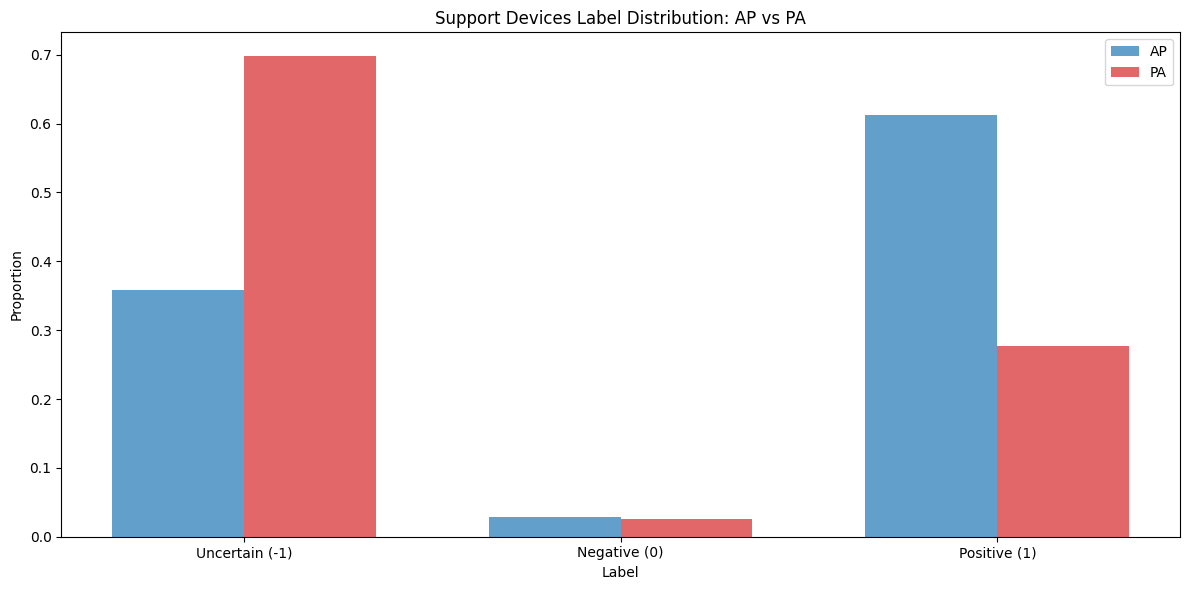

In [40]:
def analyze_support_devices(metadata_ap, metadata_pa):
    # Calculate proportions for AP
    ap_stats = {
        'total': len(metadata_ap),
        'uncertain': (metadata_ap['Support Devices'] == -1).sum(),
        'negative': (metadata_ap['Support Devices'] == 0).sum(),
        'positive': (metadata_ap['Support Devices'] == 1).sum()
    }
    ap_stats['proportions'] = {
        'uncertain': ap_stats['uncertain'] / ap_stats['total'],
        'negative': ap_stats['negative'] / ap_stats['total'],
        'positive': ap_stats['positive'] / ap_stats['total']
    }
    
    # Calculate proportions for PA
    pa_stats = {
        'total': len(metadata_pa),
        'uncertain': (metadata_pa['Support Devices'] == -1).sum(),
        'negative': (metadata_pa['Support Devices'] == 0).sum(),
        'positive': (metadata_pa['Support Devices'] == 1).sum()
    }
    pa_stats['proportions'] = {
        'uncertain': pa_stats['uncertain'] / pa_stats['total'],
        'negative': pa_stats['negative'] / pa_stats['total'],
        'positive': pa_stats['positive'] / pa_stats['total']
    }
    
    # Create summary DataFrame
    summary = pd.DataFrame({
        'AP_Count': [ap_stats['uncertain'], ap_stats['negative'], ap_stats['positive']],
        'AP_Proportion': [ap_stats['proportions']['uncertain'], 
                         ap_stats['proportions']['negative'], 
                         ap_stats['proportions']['positive']],
        'PA_Count': [pa_stats['uncertain'], pa_stats['negative'], pa_stats['positive']],
        'PA_Proportion': [pa_stats['proportions']['uncertain'], 
                         pa_stats['proportions']['negative'], 
                         pa_stats['proportions']['positive']]
    }, index=['Uncertain (-1)', 'Negative (0)', 'Positive (1)'])
    
    # Additional analysis - cross-tabulation with other relevant features
    # For example, with patient position or other devices
    if 'Patient Position' in metadata_ap.columns:
        position_devices_ap = pd.crosstab(
            metadata_ap['Patient Position'], 
            metadata_ap['Support Devices'],
            normalize='index'
        )
        position_devices_pa = pd.crosstab(
            metadata_pa['Patient Position'], 
            metadata_pa['Support Devices'],
            normalize='index'
        )
    else:
        position_devices_ap = None
        position_devices_pa = None
    
    return {
        'summary': summary,
        'ap_stats': ap_stats,
        'pa_stats': pa_stats,
        'position_analysis': {
            'AP': position_devices_ap,
            'PA': position_devices_pa
        }
    }

# Example usage
results = analyze_support_devices(metadata_ap, metadata_pa)
print("\nSupport Devices Distribution Summary:")
print(results['summary'])

# Visualize the proportions
plt.figure(figsize=(12, 6))

# Create grouped bar plot
bar_width = 0.35
index = np.arange(3)

plt.bar(index, results['summary']['AP_Proportion'], bar_width, 
        label='AP', color='tab:blue', alpha=0.7)
plt.bar(index + bar_width, results['summary']['PA_Proportion'], bar_width,
        label='PA', color='tab:red', alpha=0.7)

plt.xlabel('Label')
plt.ylabel('Proportion')
plt.title('Support Devices Label Distribution: AP vs PA')
plt.xticks(index + bar_width/2, ['Uncertain (-1)', 'Negative (0)', 'Positive (1)'])
plt.legend()

plt.tight_layout()
plt.show()